In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [335]:
df = pd.read_csv('weather_train.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Data Cleaning 

In [336]:
test = pd.read_csv('weather_test.csv')



In [337]:

test['RainTomorrow'] = pd.Series(np.where(test.RainTomorrow.values == 'Yes', 1, 0),
          test.index)
test['RainToday'] = pd.Series(np.where(test.RainToday.values == 'Yes', 1, 0),
          test.index)

In [338]:
df['RainTomorrow'] = pd.Series(np.where(df.RainTomorrow.values == 'Yes', 1, 0), df.index)



In [339]:
df['RainToday'] = pd.Series(np.where(df.RainToday.values == 'Yes', 1, 0), df.index)

In [340]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


**Dropping type=Object columns**

In [341]:

train = df.drop(['Date', 'Location', 'WindGustDir', 'WindDir3pm','WindDir9am'], axis = 1)


In [342]:

test = test.drop(['Date', 'Location', 'WindGustDir', 'WindDir3pm','WindDir9am'], axis = 1)


In [343]:
train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


**Replacing NaN values with mean**

In [344]:
column = [col for col in train]

for i in column:
    mean = train[i].mean()
    train[i].fillna(value=mean, inplace=True)

In [345]:
column = [col for col in test]

for i in column:
    mean = test[i].mean()
    test[i].fillna(value=mean, inplace=True)

In [346]:
train.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [347]:
test.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [120]:
train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.52876,7.568706,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00000,4.487216,16.9,21.8,0,0
1,7.4,25.1,0.0,5.52876,7.568706,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.43216,4.487216,17.2,24.3,0,0
2,12.9,25.7,0.0,5.52876,7.568706,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.43216,2.000000,21.0,23.2,0,0
3,9.2,28.0,0.0,5.52876,7.568706,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.43216,4.487216,18.1,26.5,0,0
4,17.5,32.3,1.0,5.52876,7.568706,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00000,8.000000,17.8,29.7,0,0


array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>],
       [<AxesSubplot:title={'center':'RainToday'}>,
        <AxesSubplot:title={'center':'RainTomorrow'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=o

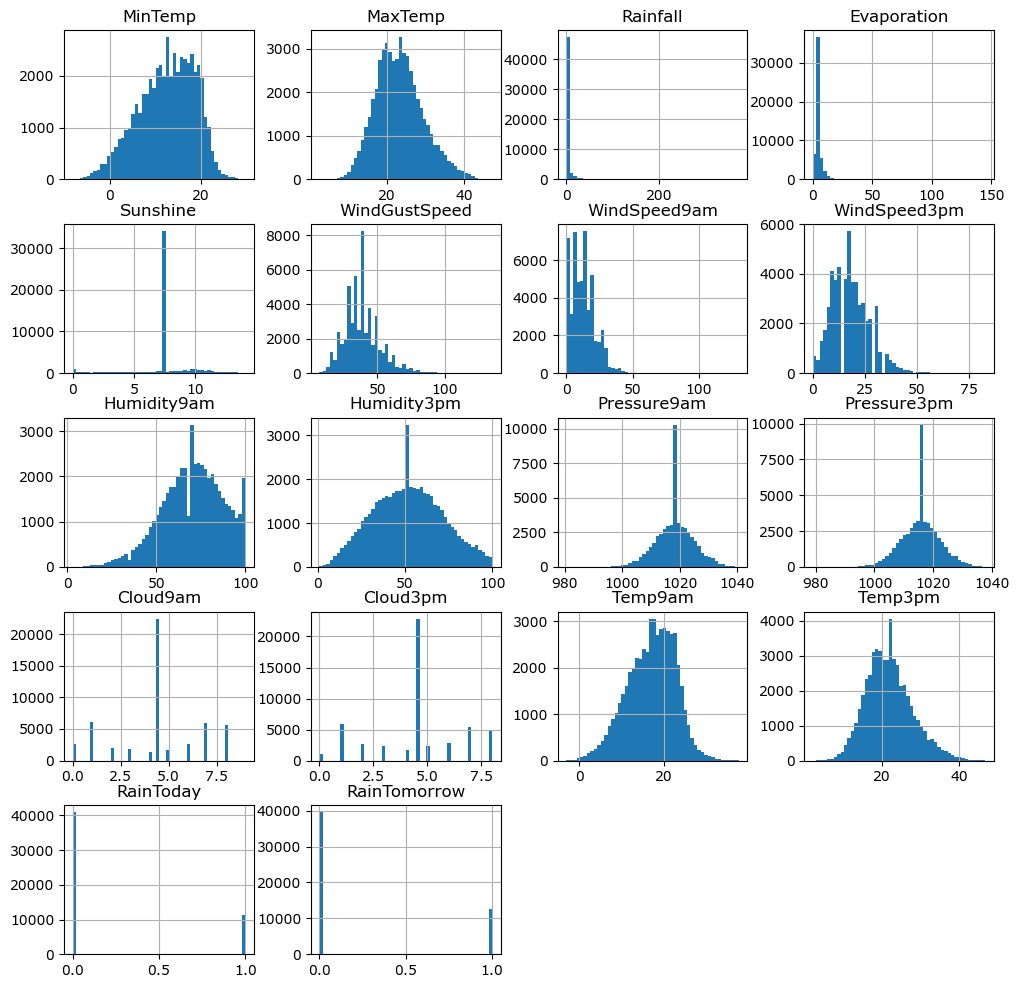

In [350]:
train.hist(bins=50, figsize=(12,12))

In [351]:
X = train.iloc[:,0:16]
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.52876,7.568706,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00000,4.487216,16.9,21.8
1,7.4,25.1,0.0,5.52876,7.568706,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.43216,4.487216,17.2,24.3
2,12.9,25.7,0.0,5.52876,7.568706,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.43216,2.000000,21.0,23.2
3,9.2,28.0,0.0,5.52876,7.568706,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.43216,4.487216,18.1,26.5
4,17.5,32.3,1.0,5.52876,7.568706,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,-1.2,15.1,0.4,5.52876,7.568706,15.0,0.0,7.0,100.0,38.0,1028.8,1026.3,4.43216,4.487216,-0.4,14.7
52058,-0.4,14.0,0.0,5.52876,7.568706,24.0,0.0,15.0,83.0,44.0,1029.5,1025.0,4.43216,4.487216,6.0,13.1
52059,-3.5,13.4,0.0,5.52876,7.568706,33.0,6.0,13.0,100.0,38.0,1022.0,1016.1,4.43216,4.487216,0.1,12.9
52060,0.1,14.5,0.0,5.52876,7.568706,35.0,9.0,17.0,64.0,43.0,1017.1,1015.4,4.43216,4.487216,9.5,13.1


In [352]:
X['RainToday'] = train.iloc[:, 16:17]

In [353]:
X.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.52876,7.568706,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00000,4.487216,16.9,21.8,0
1,7.4,25.1,0.0,5.52876,7.568706,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.43216,4.487216,17.2,24.3,0
2,12.9,25.7,0.0,5.52876,7.568706,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.43216,2.000000,21.0,23.2,0
3,9.2,28.0,0.0,5.52876,7.568706,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.43216,4.487216,18.1,26.5,0
4,17.5,32.3,1.0,5.52876,7.568706,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00000,8.000000,17.8,29.7,0
5,14.6,29.7,0.2,5.52876,7.568706,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.43216,4.487216,20.6,28.9,0
6,14.3,25.0,0.0,5.52876,7.568706,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.00000,4.487216,18.1,24.6,0
7,7.7,26.7,0.0,5.52876,7.568706,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,4.43216,4.487216,16.3,25.5,0
8,9.7,31.9,0.0,5.52876,7.568706,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,4.43216,4.487216,18.3,30.2,0
9,13.1,30.1,1.4,5.52876,7.568706,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,4.43216,4.487216,20.1,28.2,1


In [354]:
y = train['RainTomorrow']
y

0        0
1        0
2        0
3        0
4        0
        ..
52057    0
52058    0
52059    0
52060    0
52061    0
Name: RainTomorrow, Length: 52062, dtype: int32

In [355]:
train['RainToday'].value_counts()

0    40814
1    11248
Name: RainToday, dtype: int64

In [356]:
m, n = X.shape

X = np.concatenate([np.ones((m,1)), X], axis = 1)
X


array([[ 1. , 13.4, 22.9, ..., 16.9, 21.8,  0. ],
       [ 1. ,  7.4, 25.1, ..., 17.2, 24.3,  0. ],
       [ 1. , 12.9, 25.7, ..., 21. , 23.2,  0. ],
       ...,
       [ 1. , -3.5, 13.4, ...,  0.1, 12.9,  0. ],
       [ 1. ,  0.1, 14.5, ...,  9.5, 13.1,  0. ],
       [ 1. , -5.8, 14.4, ..., -0.5, 11.3,  0. ]])

In [357]:
m,n

(52062, 17)

**Sigmoid and Cost Function:**

In [358]:
def sigmoid(z):
    
    z = np.array(z)
    
    g = np.zeros(z.shape)
    
    g = 1/(1 + np.exp(-z))

    return g

In [359]:

def costFunction(w, X, y):
    
    h = sigmoid(np.dot(X,w))
    J = -1/m * np.sum(y*np.log(h)+ (1-y)*np.log(1-h))
    grad = 1/m *(np.dot(X.T, h-y))
    
    return J,grad

In [360]:
def predict(w_optimized, X):
    
    z = np.dot(X,w_optimized)
    p1  = sigmoid(z)
    p = np.round(p1)
    
    return p

**Normalizing Data Set**

In [361]:
X = (X-X.min())/(X.min()-X.max())

In [362]:
w0 = np.zeros(X.shape[1])
costFunction(w0,X,y)

(0.6931471805599453,
 array([-0.00227259, -0.00470103, -0.00803805, -0.00184033, -0.00344643,
        -0.00416701, -0.01067444, -0.00479696, -0.00622478, -0.01760142,
        -0.01133292, -0.2538869 , -0.25320742, -0.00288538, -0.00288388,
        -0.00612124, -0.00775216, -0.00203517]))

**Optimizing Cost Function using Scipy**

In [363]:
from scipy import optimize

In [364]:
w0 = np.random.randn(X.shape[1])

In [365]:
len(w0)

18

In [366]:
#res = optimize.minimize(fun=costFunction, x0=w0, args=(X, y),method = 'TNC')
options = {'maxfun' : 5000}
loss_list = []
def callback(x):
    loss_list.append(costFunction(x, X, y)[0])

res = optimize.minimize(fun=costFunction, x0=w0, args=(X, y),method = 'TNC', jac=True, callback=callback, options=options)


Text(0, 0.5, 'Loss')

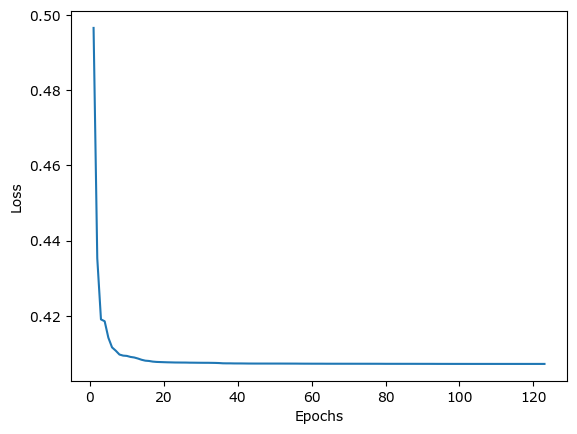

In [367]:
plt.plot(np.arange(1,len(loss_list)+1,1), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [368]:
w_optim = res.x
print("Optimized Weights: ", w_optim)

Optimized Weights:  [-1.24070664e+03  2.20158523e+01 -2.89438809e+01 -1.31141498e+01
 -1.48557703e+01  1.18680450e+02 -4.76013857e+01 -7.37684187e+00
  2.94564051e+01 -1.00476816e+01 -5.62469845e+01 -1.01422426e+02
  1.23842609e+02 -2.63058053e+01 -1.32991085e+02  3.22292000e-01
 -1.21142146e+01 -3.02391018e+02]


In [369]:
print("Loss Computed at the Optimized Weights:", loss_list[-1])

Loss Computed at the Optimized Weights: 0.40718294780821923


**Calculating Accuracy on Training Data**

In [370]:
y_pred_train = predict(w_optim,X)
y_true_train = df['RainTomorrow']

In [371]:
k = 0
for i in range(X.shape[0]):
    if y_pred_train[i]==y_true_train[i]:
        k = k+1
        
print("Training Accuracy=", k*100/X.shape[0], "%")

Training Accuracy= 82.35757366217203 %


In [372]:
y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

**Preparing Test Data**

In [373]:
X_test = test.iloc[:,0:17]
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,19.0,44.500000,0.0,6.096236,13.100000,54.000000,26.0,15.0,27.0,10.0,1015.3,1009.7,3.780706,3.935895,31.2,42.9,0
1,31.2,44.300000,0.0,6.096236,12.200000,54.000000,31.0,30.0,10.0,22.0,1007.7,1007.8,3.780706,3.935895,40.2,35.8,0
2,19.3,30.300000,0.0,6.096236,9.400000,46.000000,22.0,28.0,63.0,43.0,1010.9,1009.5,7.000000,2.000000,23.2,27.6,0
3,14.0,29.700000,0.0,6.096236,13.100000,44.000000,17.0,30.0,43.0,29.0,1012.2,1009.5,0.000000,0.000000,23.0,29.0,0
4,12.7,27.900000,0.0,6.096236,12.400000,50.000000,11.0,31.0,48.0,34.0,1008.4,1008.4,1.000000,3.000000,23.4,25.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29088,2.8,23.400000,0.0,6.096236,8.422771,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,3.780706,3.935895,10.1,22.4,0
29089,3.6,25.300000,0.0,6.096236,8.422771,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,3.780706,3.935895,10.9,24.5,0
29090,5.4,26.900000,0.0,6.096236,8.422771,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,3.780706,3.935895,12.5,26.1,0
29091,7.8,27.000000,0.0,6.096236,8.422771,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0


In [374]:
X_test = (X_test-X_test.min())/(X_test.max()-X_test.min())
X_test.shape

(29093, 17)

In [375]:
X_test.shape

(29093, 17)

In [376]:
# Setup the data matrix appropriately, and add ones for the bias term in X
mt, nt = X_test.shape

X_test = np.concatenate([np.ones((mt,1)), X_test], axis = 1)
X_test.shape


(29093, 18)

In [377]:
X_test.shape

(29093, 18)

In [378]:
mt,nt, len(w_optim)

(29093, 17, 18)

In [379]:
X_test.shape

(29093, 18)

**Making predictions on Test Set**

In [380]:
y_pred = predict(w_optim,X_test)

C:\Users\SOBAN\AppData\Local\Temp\ipykernel_16108\3292832619.py:7: RuntimeWarning: overflow encountered in exp
  g = 1/(1 + np.exp(-z))


In [381]:

y_actual = test['RainTomorrow']

In [382]:
k = 0
for i in range(len(y_pred)):
    if y_pred[i]==y_actual[i]:
        k = k+1
        


print("Test Accuracy: " ,k/(len(y_pred))*100,"%")


Test Accuracy:  80.10517994019179 %
